### Modeling

#### Importing Libraries and Reading Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [2]:
text = pd.read_csv('./datasets/text.csv').drop(columns=['Unnamed: 0'])
tickers = pd.read_csv('./datasets/tickers.csv').drop(columns=['Unnamed: 0'])

In [3]:
text = text.dropna(subset=['all_text'])
text.head()

,subreddit,title,selftext,all_text
0,wallstreetbets,"Made 45k on QQQ puts in 3 days, will finally p...",NaN,Made k on QQQ puts in days will finally pay of...
1,wallstreetbets,There is a mining program giving unprecedented...,NaN,There is a mining program giving unprecedented...
2,wallstreetbets,TUESDAY = $ B B I G 🚀🚀🚀LFG 🚀🚀🚀,[removed],TUESDAY B B I G 🚀🚀🚀LFG 🚀🚀🚀
3,wallstreetbets,PTN almost at the double Botham 🥳🍾💵💵💵💵💵💵,NaN,PTN almost at the double Botham 🥳🍾💵💵💵💵💵💵
4,wallstreetbets,I love weeklies. Fuck AMC,NaN,I love weeklies Fuck AMC


In [4]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18751 entries, 0 to 18790
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  18751 non-null  object
 1   title      18751 non-null  object
 2   selftext   13239 non-null  object
 3   all_text   18751 non-null  object
dtypes: object(4)
memory usage: 732.5+ KB


#### Preliminary Model using Count Vectorizer and Logistic Regression 

In [36]:
#Defining X and Y
X= text['all_text']
y= text['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [37]:
#Baseline Accuracy Test
y.value_counts(normalize=True)

stocks            0.500453
wallstreetbets    0.499547
Name: subreddit, dtype: float64

In [38]:
#Instantiate count vectorizer and fit on training data
cv = CountVectorizer(
    #max_df=.75,
    min_df=3,
    #max_features=
    #stop_words='english'
)
cv.fit(X_train)

CountVectorizer(min_df=3)

In [39]:
# Transform the corpus.
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [40]:
#Put X_train_cv into a data frame
cv_df = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())
cv_df.head()

,aa,aaa,aaaand,aaii,aal,aapl,aaron,ab,abandoned,abbott,...,zone,zones,zoom,zoomed,zooming,zs,zscaler,zuck,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Instantiate Logistic Regression
lr = LogisticRegression(max_iter=1000)

#Fit lr on train data
lr.fit(X_train_cv, y_train)

#Score model on traini and test data
lr.score(X_train_cv, y_train), lr.score(X_test_cv, y_test)

(0.9006613098200953, 0.7502133105802048)

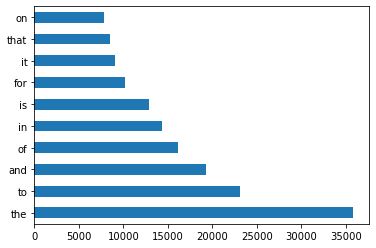

In [42]:
cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

#### Preliminary Model on ticker text using CV and LogReg

In [43]:
tickers = tickers.dropna(subset=['ticker_text'])
tickers.head()

,subreddit,ticker_text,ticker_counts
0,wallstreetbets,QQQ,1
2,wallstreetbets,LFG,1
3,wallstreetbets,PTN,1
4,wallstreetbets,AMC,1
5,wallstreetbets,SPY,1


In [44]:
#Defining X and Y
X= tickers['ticker_text']
y= tickers['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [45]:
#Instantiate count vectorizer and fit on training data
cv = CountVectorizer(
    #max_df=.75,
    #min_df=3
    #max_features=
)
cv.fit(X_train)

CountVectorizer()

In [46]:
# Transform the corpus.
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [47]:
#Put X_train_cv into a data frame
ticker_cv_df = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())
ticker_cv_df.head()

,aa,aaa,aab,aabb,aabvf,aag,aaii,aal,aamco,aap,...,zm,znga,zngn,znog,zom,zoom,zq,zs,zynga,zyxi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Instantiate Logistic Regression
lr = LogisticRegression()#max_iter=1000)

#Fit lr on train data
lr.fit(X_train_cv, y_train)

#Score model on traini and test data
lr.score(X_train_cv, y_train), lr.score(X_test_cv, y_test)

(0.845428388746803, 0.714765100671141)

Text(0.5, 1.0, 'Top 20 Tickers By Count')

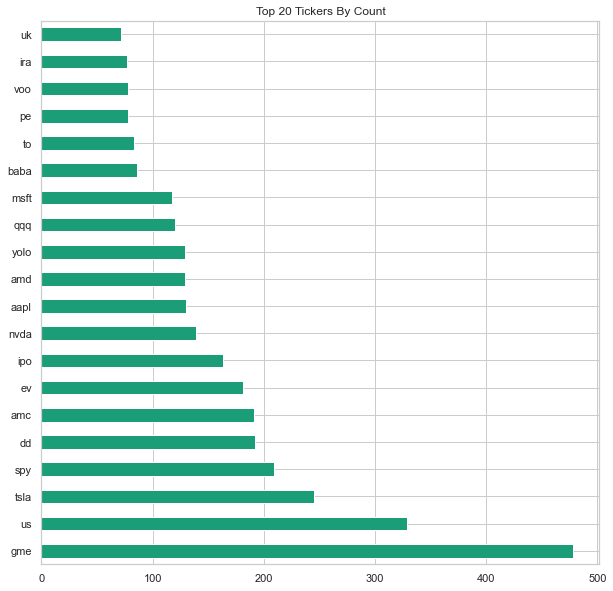

In [212]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
ticker_cv_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', cmap='Dark2');
plt.title("Top 20 Tickers By Count")

#### Setting up pipe to iterate models and grid search.

In [74]:
#Defining X and Y
X= text['all_text']
y= text['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [75]:
#CV, MNB

In [76]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB()),
])

In [77]:
params = {
    'cv__stop_words': [None, 'english'],
    'cv__min_df': [1,2,3],
    'cv__max_df': [1.0, 0.95]
}

gs = GridSearchCV(
    pipe,
    param_grid=params,
    cv=5
)

In [78]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cv__max_df': [1.0, 0.95], 'cv__min_df': [1, 2, 3],
                         'cv__stop_words': [None, 'english']})

In [79]:
gs.best_score_

0.7506224150320171

In [80]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8294816184313447, 0.7482935153583617)

In [81]:
gs.best_params_

{'cv__max_df': 1.0, 'cv__min_df': 1, 'cv__stop_words': None}

In [82]:
#Tfidf, MNB

In [83]:
pipe2= Pipeline([
    ('tf', TfidfVectorizer()),
    ('mnb', MultinomialNB()),
])

In [84]:
params = {
    'tf__stop_words': [None, 'english'],
    'tf__min_df': [1,2,3],
    'tf__max_df': [1.0, 0.95]
}

gs2 = GridSearchCV(
    pipe2,
    param_grid=params,
    cv=5
)

In [85]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'tf__max_df': [1.0, 0.95], 'tf__min_df': [1, 2, 3],
                         'tf__stop_words': [None, 'english']})

In [86]:
gs2.best_score_

0.7700349525344381

In [87]:
gs2.score(X_train, y_train), gs2.score(X_test, y_test)

(0.8360236080494916, 0.7591723549488054)

In [88]:
gs2.best_params_

{'tf__max_df': 1.0, 'tf__min_df': 3, 'tf__stop_words': None}

Model Performance is almost the same between CV vs TFIDF and LogReg vs multinomialNB but TFIDF is ever so slightly better and perhaps faster running so I will proceed to model with decision trees, ensemble methods, Adaboosting and SVM with the TFIDF vectorizer. 

In [ ]:
#Decision Tree Classifier

In [140]:
#Defining X and Y
X= text['all_text']
y= text['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#Instantiate and tfidfvectorizer 
tf = TfidfVectorizer(min_df=3)
tf.fit(X_train)

#transform data splits
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [104]:
dt = DecisionTreeClassifier()

In [105]:
params={
    'max_depth': [2,3,5,7],
    'min_samples_split': [5,10,15,20],
    'min_samples_leaf': [2,3,4,5,6],
    'ccp_alpha': [0,0.001,0.01,0.1,1,10]
}

gs3 = GridSearchCV(
    dt,
    param_grid=params,
    cv=5,
    verbose=1
)

In [107]:
gs3.fit(X_train_tf, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [109]:
gs3.score(X_train_tf, y_train), gs3.score(X_test_tf, y_test)

(0.6797980516248311, 0.6550767918088737)

In [110]:
gs3.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, max_depth=7, min_samples_leaf=5,
                       min_samples_split=10)

In [111]:
gs3.best_score_

0.6625194496796271

In [112]:
#AdaBoostClassifier

In [145]:
abc = AdaBoostClassifier(random_state=42, n_estimators=50)
abc.fit(X_train_tf, y_train)
abc.score(X_train_tf, y_train), abc.score(X_test_tf, y_test)

(0.7284363222640973, 0.7160836177474402)

In [146]:
feature_names = tf.get_feature_names()
len(feature_names)

10351

In [147]:
sum(abc.feature_importances_ != 0)

47

In [155]:
feature_df = pd.DataFrame(abc.feature_importances_, index=feature_names, columns=['importance'])
feature_df.loc[feature_df['importance']!=0].sort_values(by='importance', ascending=False).head(20)

,importance
investing,0.06
stock,0.04
advice,0.02
question,0.02
retards,0.02
rise,0.02
short,0.02
shorts,0.02
stocks,0.02
tax,0.02


In [149]:
params={
    'random_state': [None, 42],
    'n_estimators': [25,50,100,150,200],
    'learning_rate': [0.5, 1.0, 1.5, 2.0]
}

gs4 = GridSearchCV(
    abc,
    param_grid=params,
    cv=5,
    verbose=1
)

In [151]:
gs4.fit(X_train_tf, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [25, 50, 100, 150, 200],
                         'random_state': [None, 42]},
             verbose=1)

In [152]:
gs4.score(X_train_tf, y_train), gs4.score(X_test_tf, y_test)

(0.7794922847187655, 0.7431740614334471)

In [153]:
gs4.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [159]:
abc2 = AdaBoostClassifier(learning_rate=0.5, n_estimators=200)
abc2.fit(X_train_tf, y_train)
abc2.score(X_train_tf, y_train), abc2.score(X_test_tf, y_test)

(0.7794922847187655, 0.7431740614334471)

In [163]:
abc2.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [164]:
abc2_df = pd.DataFrame(abc2.feature_importances_, index=feature_names, columns=['importance'])
abc2_df.loc[abc2_df['importance']!=0].sort_values(by='importance', ascending=False).head(20)

,importance
stock,0.020
xb,0.015
stocks,0.015
investing,0.015
etf,0.010
etfs,0.010
short,0.010
tax,0.010
vs,0.010
gme,0.010


DecisionTree was very slow running and was outperformed by AdaBooster. Both were able to limit bias/variance in their models compared to the performance of LogReg and MultinomialNB. Most interesting to me is looking at the feature importances of tokens (that !=0). 

In [165]:
#Taking a look at the AdaBoost model on the ticker tokens only:

In [166]:
#Defining X and Y
X= tickers['ticker_text']
y= tickers['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#Instantiate and tfidfvectorizer 
tf = TfidfVectorizer(min_df=3)
tf.fit(X_train)

#transform data splits
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [169]:
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=200)
ada.fit(X_train_tf, y_train)
ada.score(X_train_tf, y_train), ada.score(X_test_tf, y_test)

(0.7273017902813299, 0.6893576222435283)

In [171]:
features = tf.get_feature_names()

In [202]:
ada_df = pd.DataFrame(ada.feature_importances_, index=features, columns=['importance'])
ada_df.loc[ada_df['importance']!=0].sort_values(by='importance', ascending=False).head(20)

,importance
gme,0.020
yolo,0.015
tsla,0.015
amc,0.015
pe,0.015
eps,0.010
llc,0.010
tlry,0.010
dca,0.010
huge,0.010


<Figure size 720x720 with 0 Axes>

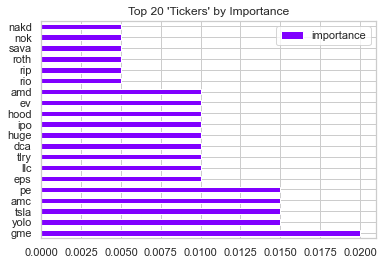

In [207]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10));
ada_df.loc[ada_df['importance']!=0].sort_values(by='importance', ascending=False).head(20).plot(kind='barh', cmap='rainbow');
plt.title("Top 20 'Tickers' by Importance");

In [182]:
#SVC models

In [181]:
#Defining X and Y
X= text['all_text']
y= text['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#Instantiate and tfidfvectorizer 
tf = TfidfVectorizer(min_df=3)
tf.fit(X_train)

#transform data splits
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

After multiple attempts of trimming paramaters I set to be tuned I could not a SVC grid search to fit in a reasonable amount of time (no fit within 2hr's) so I am commenting out the grid search and using custom SVC parameters instead. 

In [187]:
# # Instantiate SVC.
# # Fit on training data.
# # Evaluate model.

# params={
#     "C":[0.1,0.3,0.5,1.0],
#     'gamma':[1,0.001],
#     'kernel':['rbf', 'poly'],
#     'degree':[2]

# }
# svc=GridSearchCV(
#     SVC(),
#     params,
#     verbose=1
# )
# svc.fit(X_train_tf, y_train)
# svc.score(X_train_tf, y_train), svc.score(X_test_tf, y_test)

In [ ]:
# svc.best_estimator_

In [184]:
svc = SVC(degree=2, kernel='poly')
svc.fit(X_train_tf, y_train)
svc.score(X_train_tf, y_train), svc.score(X_test_tf, y_test)

(0.9805873568939771, 0.7930887372013652)

In [188]:
# Now trying these SVC parameters on the ticker text data:

In [189]:
#Defining X and Y
X= tickers['ticker_text']
y= tickers['subreddit']

#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#Instantiate and tfidfvectorizer 
tf = TfidfVectorizer(min_df=3)
tf.fit(X_train)

#transform data splits
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [190]:
svc2 = SVC(degree=2, kernel='poly')
svc2.fit(X_train_tf, y_train)
svc2.score(X_train_tf, y_train), svc2.score(X_test_tf, y_test)

(0.8257672634271099, 0.6941514860977949)